In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
stats.norm.pdf(0)

0.3989422804014327

In [6]:
stats.norm.cdf(-10000)

0.0

In [14]:
stats.norm(1,2).var()

4.0

In [16]:
stats.norm.rvs(size=3, random_state=12345)

array([-0.20470766,  0.47894334, -0.51943872])

In [17]:
from scipy.stats import uniform
uniform.cdf([0, 1, 2, 3, 4, 5], loc=1, scale=4)

array([0.  , 0.  , 0.25, 0.5 , 0.75, 1.  ])

In [19]:
stats.gamma.fit(np.random.rand(5))

(568.0696671500461, -4.652903496000139, 0.00927295354750253)

5.0


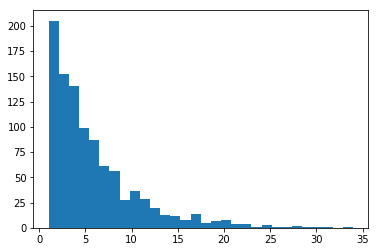

In [24]:
sample=stats.expon.rvs(loc=1,scale=5, size=1000)
print(stats.expon.mean(scale=5))
plt.hist(sample, bins=30)
plt.show()

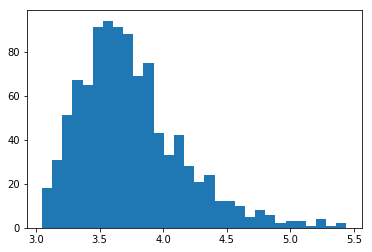

In [28]:
sample=stats.gamma.rvs(loc=3,scale=1/4,a=3, size=1000)
plt.hist(sample, bins=30)
plt.show()

(-9.71842035146775e-06, 0.3337931640181486)


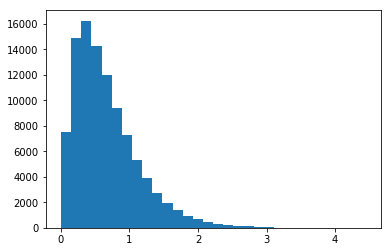

In [51]:
sample=stats.gamma.rvs(loc=0, scale=1/3, a=2, size=100000)
a_n = stats.gamma.fit_loc_scale(sample, 2)
print(a_n)
plt.hist(sample, bins=30)
plt.show()

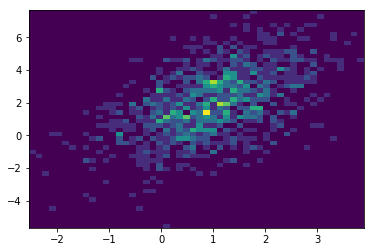

In [62]:
sample=stats.multivariate_normal.rvs(mean=[1,2], cov=[[1,1],[1,4]], size=1000)
plt.hist2d(sample[:,0], sample[:,1], bins=50)
#plt.axis('equal')
plt.show()

True [-0.07164941 -0.37702592  0.45476233]


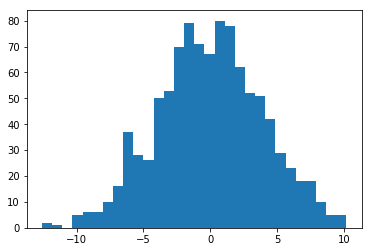

In [77]:
sample=stats.norm.rvs(loc=0, scale=4, size=1000)
z1=np.hstack((np.ones((334,1)), np.zeros((334,2))))
z2=np.hstack((np.zeros((333,1)), np.ones((333,1)), np.zeros((333,1))))
z3=np.hstack(((np.zeros((333,2)), np.ones((333,1)))))
z = np.vstack((z1,z2,z3))
a_n = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(z),z)),np.matrix.transpose(z)),sample)
T = np.array([[1,-1,0], [1,1,-1]])
t_n = np.matmul(T, a_n)
tau = np.array([0,0])
B = np.matmul(np.matmul(T,np.linalg.inv(np.matmul(np.matrix.transpose(z),z))), np.matrix.transpose(T))
F = np.matmul(np.matmul(np.linalg.inv(B), t_n), np.matrix.transpose(t_n))/2*(1000-3)/np.linalg.norm(sample-np.matmul(z,a_n))**2
print(F>stats.f.ppf(0.01, 2,997), a_n)
plt.hist(sample, bins=30)
plt.show()

In [15]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(10)


survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [82]:
titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [85]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [1]:
import seaborn as sns

In [6]:
df = sns.load_dataset('car_crashes')
df.head(10)

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.48     DE  
8      136.05     DC  
9      144.18     FL

In [9]:
df.index.size

51

In [16]:
titanic.groupby('pclass')['survived'].sum()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

In [17]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

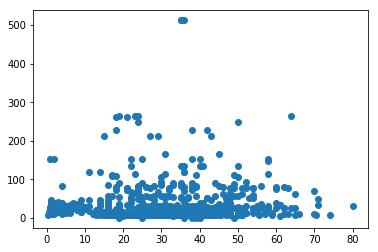

In [19]:
plt.scatter(titanic.age.values, titanic.fare.values)

In [21]:
titanic.groupby(['survived','sex']).fare.sum()

survived  sex   
0         female     1864.9752
          male      10277.7447
1         female    12101.6876
          male       4449.5418
Name: fare, dtype: float64

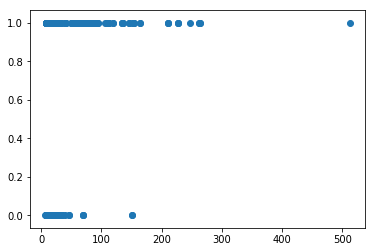

In [23]:
plt.scatter(titanic[titanic.sex=='female'].fare.values, titanic[titanic.sex=='female'].survived.values)
plt.show()

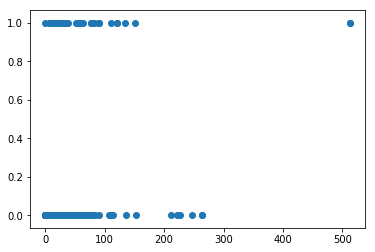

In [25]:
plt.scatter(titanic[titanic.sex=='male'].fare.values, titanic[titanic.sex=='male'].survived.values)
plt.show()

In [26]:
titanic.groupby('embarked')['survived'].sum()

embarked
C     93
Q     30
S    217
Name: survived, dtype: int64

In [27]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [28]:
titanic.groupby('survived').alone.sum()

survived
0    374.0
1    163.0
Name: alone, dtype: float64

In [29]:
titanic.alone.value_counts()

True     537
False    354
Name: alone, dtype: int64